# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Putra
- **Email:** pashalv74@gmail.com
- **ID Dicoding:** Muhammad Putra

## Menentukan Pertanyaan Bisnis

Dalam proyek ini, saya ingin mencari jawaban atas beberapa masalah berikut:
1. Bagaimana tren pertumbuhan jumlah penyewaan sepeda setiap bulannya sepanjang tahun 2012?
2. Bagaimana pengaruh perbedaan kondisi cuaca (Cerah, Mendung, Hujan) terhadap rata-rata jumlah penyewaan sepeda harian pada periode 2011-2012?

## Import Semua Packages/Library yang Digunakan

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style untuk visualisasi
sns.set(style='whitegrid')

## Data Wrangling

### Gathering Data

In [13]:
# Memuat dataset day.csv
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


> **Insight:**
> Tahap ini dilakukan untuk memuat dataset day.csv ke dalam DataFrame day_df. Dataset ini berisi informasi agregat harian mengenai jumlah penyewaan sepeda beserta variabel pendukung seperti kondisi cuaca, musim, dan informasi penanggalan.

### Assessing Data

In [14]:
# Memeriksa struktur data
day_df.info()

# Memeriksa keberadaan nilai kosong
print("Jumlah missing values:\n", day_df.isna().sum())

# Memeriksa duplikasi data
print("Jumlah duplikasi: ", day_df.duplicated().sum())

# Memeriksa parameter statistik
day_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah missing values:
 instant       0
dteday        0
season        0
yr            0
mnth 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


> **Insight:**
>Berdasarkan hasil pemeriksaan, tidak ditemukan adanya data yang hilang (missing values) maupun data duplikat pada dataset. Namun, ditemukan ketidaksesuaian tipe data pada kolom dteday yang masih bertipe object, sehingga diperlukan konversi menjadi tipe data datetime. Selain itu, kolom kategorikal seperti weathersit memerlukan pemetaan (mapping) nilai numerik ke label kategori agar hasil analisis lebih intuitif.

### Cleaning Data

In [15]:
# Mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Mengubah angka pada weathersit menjadi keterangan kategori
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear',
    2: 'Misty/Cloudy',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Fog'
})

# Verifikasi perubahan
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


> **Insight:**
> Proses pembersihan data difokuskan pada sinkronisasi tipe data kolom dteday menjadi datetime untuk mempermudah analisis berbasis waktu. Selanjutnya, dilakukan pemetaan nilai pada kolom weathersit menjadi label tekstual (Clear, Misty, Rain) guna meningkatkan keterbacaan data pada tahap visualisasi.

## Exploratory Data Analysis (EDA)


### Explore Tren Dan Cuaca

In [16]:
# Eksplorasi rata-rata penyewaan berdasarkan bulan dan tahun
print(day_df.groupby(by=["yr", "mnth"]).agg({"cnt": ["mean", "sum"]}))

# Eksplorasi penyewaan berdasarkan kondisi cuaca
print(day_df.groupby(by="weathersit").cnt.mean().sort_values(ascending=False))

                 cnt        
                mean     sum
yr mnth                     
0  1     1231.903226   38189
   2     1721.964286   48215
   3     2065.967742   64045
   4     3162.333333   94870
   5     4381.322581  135821
   6     4783.733333  143512
   7     4559.387097  141341
   8     4409.387097  136691
   9     4247.266667  127418
   10    3984.225806  123511
   11    3405.566667  102167
   12    2816.870968   87323
1  1     3120.774194   96744
   2     3556.448276  103137
   3     5318.548387  164875
   4     5807.466667  174224
   5     6318.225806  195865
   6     6761.000000  202830
   7     6567.967742  203607
   8     6919.451613  214503
   9     7285.766667  218573
   10    6414.225806  198841
   11    5088.800000  152664
   12    3990.741935  123713
weathersit
Clear              4876.786177
Misty/Cloudy       4035.862348
Light Rain/Snow    1803.285714
Name: cnt, dtype: float64


> **Insight:**
> Hasil eksplorasi awal menunjukkan adanya fluktuasi jumlah penyewaan yang dipengaruhi oleh variabel waktu (bulan/tahun) dan kondisi lingkungan (cuaca). Cuaca cerah secara konsisten mencatatkan angka penyewaan yang lebih tinggi dibandingkan cuaca ekstrem, yang memberikan indikasi awal korelasi kuat antara kenyamanan cuaca dan aktivitas pengguna.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Tren Pertumbuhan Penyewaan Sepeda Tahun 2012

/tmp/ipython-input-423/4276027895.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df_2012 = df_2012.resample(rule='M', on='dteday').agg({"cnt": "sum"})


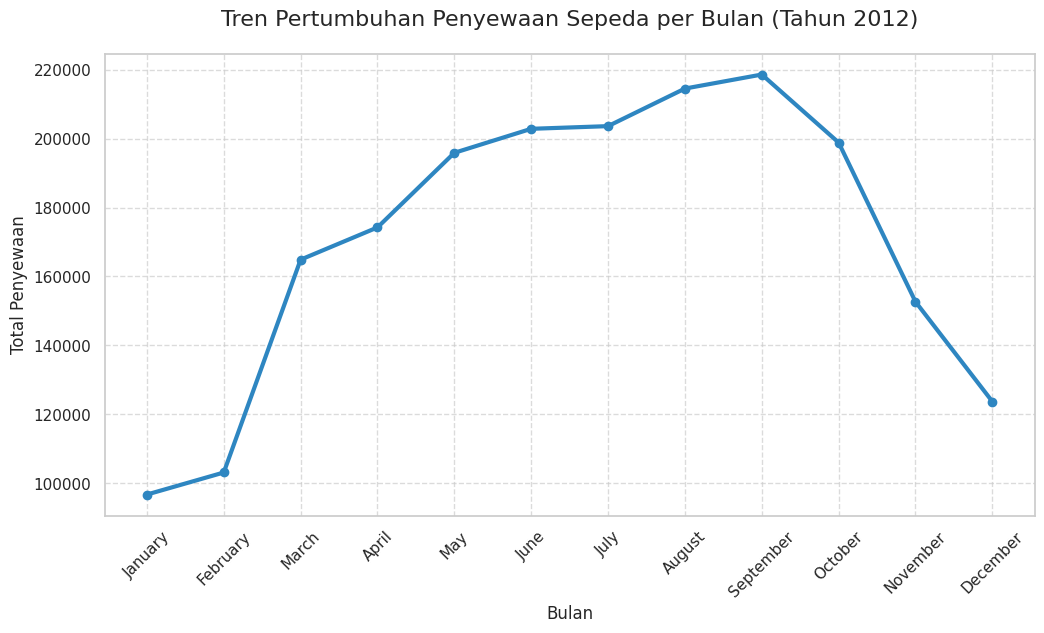

In [17]:
# Menyiapkan data tahun 2012 (yr=1)
df_2012 = day_df[day_df['dteday'].dt.year == 2012]
monthly_df_2012 = df_2012.resample(rule='M', on='dteday').agg({"cnt": "sum"})
monthly_df_2012.index = monthly_df_2012.index.strftime('%B')
monthly_df_2012 = monthly_df_2012.reset_index()

# Visualisasi Line Chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_df_2012['dteday'], monthly_df_2012['cnt'], marker='o', linewidth=3, color='#2E86C1')
plt.title("Tren Pertumbuhan Penyewaan Sepeda per Bulan (Tahun 2012)", fontsize=16, pad=20)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

> **Insight:**
> Berdasarkan grafik di atas, volume penyewaan sepeda pada tahun 2012 menunjukkan pertumbuhan yang konsisten dengan puncak tertinggi pada bulan September. Kenaikan ini mengindikasikan keberhasilan penetrasi pasar dan peningkatan popularitas layanan. Penurunan pada akhir tahun merupakan pola musiman akibat perubahan cuaca ke musim dingin, namun secara tahunan performa bisnis tetap menunjukkan tren positif yang kuat.

### Pertanyaan 2:Pengaruh Kondisi Cuaca Terhadap Penyewaan

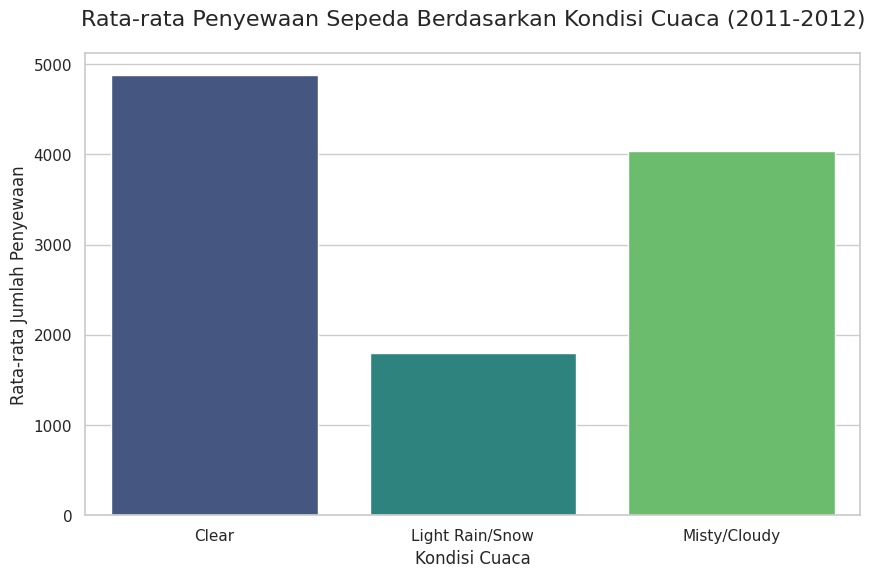

In [18]:
# Menghitung rata-rata penyewaan berdasarkan kondisi cuaca
weather_rentals = day_df.groupby('weathersit')['cnt'].mean().reset_index()

# Visualisasi Bar Chart (Pengganti Boxplot)
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals, palette='viridis', hue='weathersit', legend=False)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca (2011-2012)', fontsize=16, pad=20)
plt.xlabel('Kondisi Cuaca', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.show()

> **Insight:**
> Visualisasi ini menunjukkan bahwa kondisi cuaca memiliki pengaruh deterministik terhadap keputusan pengguna. Kondisi cerah (Clear) mencatatkan rata-rata penyewaan tertinggi secara signifikan. Sebaliknya, saat cuaca hujan atau salju, terjadi penurunan permintaan yang drastis. Temuan ini memberikan dasar bagi pihak operasional untuk menyesuaikan ketersediaan armada berdasarkan prakiraan cuaca guna menjaga efisiensi biaya pemeliharaan.

## Conclusion

**Kesimpulan Pertanyaan 1:** Pertumbuhan penyewaan sepeda selama tahun 2012 menunjukkan tren positif yang stabil dengan puncak performa pada kuartal ketiga. Hal ini mencerminkan peningkatan adopsi layanan berbagi sepeda oleh masyarakat luas.

**Kesimpulan Pertanyaan 2:** Faktor cuaca cerah merupakan pendorong utama (key driver) peningkatan jumlah penyewa. Strategi bisnis dapat dioptimalkan dengan memfokuskan ketersediaan armada dan kegiatan promosi pada periode dengan kondisi cuaca yang mendukung.